In [1]:
from pylab import *
import scipy
import ruptures as rpt
%matplotlib inline
from sklearn import mixture

In [4]:
import mat2python
data,trial,classes=mat2python.mat2python(repetition_number=0)
#sampling rate 10 Hz
oxy=data[:,0:52]
roi1=[46,47,48]
roi2=[18,28,29]
roi3=[13, 23, 24]
signal=oxy[:,roi1+roi2+roi3]

 I am loading the 0 repetition of the protocol


Consider only oxy data, discard the others

(2671, 52)


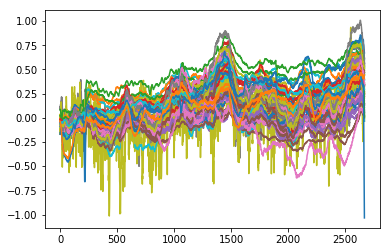

In [3]:

plot(oxy)#oxy
figure()
'''plot(data[:,52:104])#deoxy
figure()
plot(data[:,104:156])#oxy+#deoxy'''
print(shape(oxy))


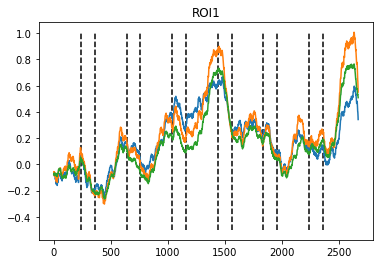

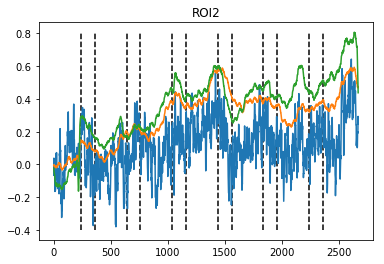

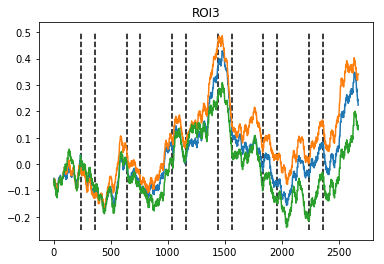

In [5]:
roi1=[46,47,48]
roi2=[18,28,29]
roi3=[13, 23, 24]
plot(oxy[:,roi1],label="ROI1")
vlines(trial,-0.5,1,linestyles="--")
title("ROI1")
figure()
vlines(trial,-0.4,0.8,linestyles="--")
plot(oxy[:,roi2],label="ROI2")
title("ROI2")
figure()
vlines(trial,-0.25,0.5,linestyles="--")
plot(oxy[:,roi3],label="ROI3")
title("ROI3")
#legend()

(2671, 9)


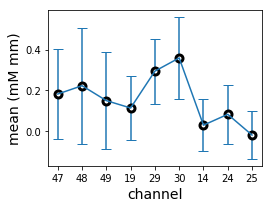

In [7]:
figure(figsize=(4,3))
signal=oxy[:,roi1+roi2+roi3]
print(shape(signal))
plot(mean(signal,axis=0),"wo",mec="k",ms=7,mew=3)
errorbar(arange(len(roi1+roi2+roi3)),mean(signal,axis=0),std(signal,axis=0),capsize=5)
ax=gca()
ax.set_xticks(arange(len(roi1+roi2+roi3)))
ax.set_xticklabels(list(array(roi1)+1)+list(array(roi2)+1)+list(array(roi3)+1))
xlabel("channel",fontsize=14)
ylabel("mean (mM mm)",fontsize=14)
tight_layout()
#savefig("./figure/mean.pdf")

(2671, 52)


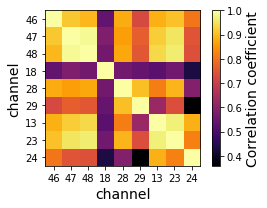

In [32]:
import mat2python
data,trial,classes=mat2python.mat2python(repetition_number=0)
oxy2=data[:2658,:52]
#sampling rate 10 Hz
figure(figsize=(4,3))
imshow(corrcoef(oxy2[:,roi1+roi2+roi3],rowvar=False),aspect="equal",cmap="inferno")
print(shape(oxy))
ax=gca()
ax.set_xticks(arange(len(roi1+roi2+roi3)))
ax.set_yticks(arange(len(roi1+roi2+roi3)))
xlabel("channel",fontsize=14)
ylabel("channel",fontsize=14)
ax.set_xticklabels(list(array(roi1)+1)+list(array(roi2)+1)+list(array(roi3)+1))
ax.set_yticklabels(list(array(roi1)+1)+list(array(roi2)+1)+list(array(roi3)+1))
cbar=colorbar(orientation="vertical")
cbar.set_label('Correlation coefficient',fontsize=14)
tight_layout()
#savefig("./figure/covariance.pdf")

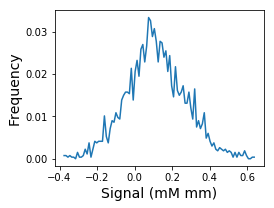

In [53]:
figure(figsize=(4,3))

h,b=histogram(signal[:,3],bins=100)
plot((b[:-1]+b[1:])/2,h/sum(h))
xlabel("Signal (mM mm)",fontsize=14)
ylabel("Frequency",fontsize=14)
tight_layout()
savefig("./figure/histogram.pdf")

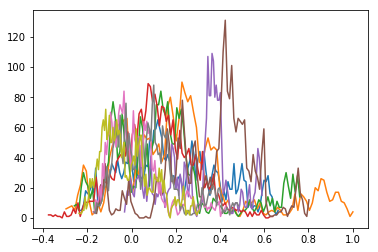

In [38]:
hs=[]
bs=[]
ss=[]
for i in arange(0,len(signal[0,:])):
    ss+=[signal[:,i]]
    h,b=histogram(signal[:,i],bins=100)
    hs+=[h]
    bs+=[b]
    plot((b[:-1]+b[1:])/2,h)

In [17]:
shape(ss)

(9, 2671)

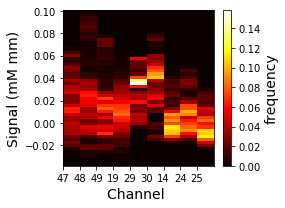

In [55]:
fig=figure(figsize=(4,3))
n_ybin=50;
## ss is a matrix of the type [channels, Time]
ch=shape(ss)[0]
T=shape(ss)[1]
x=tile(arange(0,ch),T)#repeats the arange array.
y=array(ss).flatten("F") #flattens the 19*9 matrix into 1-D array of 19*9 elements.
#Histogram is computed by looking at the number of times each point (x[i],y[i]) occurs. 
H,x_edges,y_edges=histogram2d(x,y,bins=[ch,n_ybin])
#creates  a  discrete colorbar from "hot"
# define the bins and normalize


#Normalise H to become a frequency
H=H/sum(H,axis=1)[0]
shape(H)
imshow(H.T,aspect="auto",extent=(0,ch,np.min(y)/10,np.max(y)/10),shape=(ch,n_ybin),cmap="hot",origin="lower")
cbar=colorbar()
cbar.set_label('frequency',fontsize=14)
ax=gca()
ax.set_xticks(arange(len(roi1+roi2+roi3)))
ax.set_xticklabels(list(array(roi1)+1)+list(array(roi2)+1)+list(array(roi3)+1))
xlabel("Channel ",fontsize=14)
ylabel("Signal (mM mm)",fontsize=14)

tight_layout()
#savefig("./figure/2dhistogram.pdf")

In [24]:
sum(H,axis=1)

array([ 2671.,  2671.,  2671.,  2671.,  2671.,  2671.,  2671.,  2671.,
        2671.])

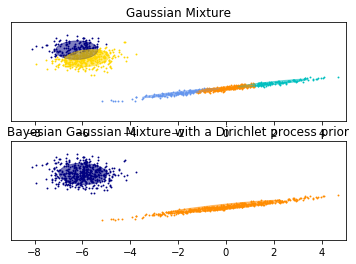

In [11]:
import itertools
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks()
    plt.yticks(())
    plt.title(title)

    
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=5,
                                        covariance_type='full').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

plt.show()

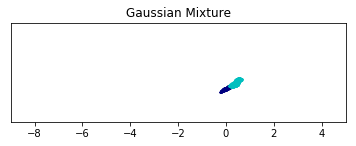

In [17]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(signal)
plot_results(signal, gmm.predict(signal), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')


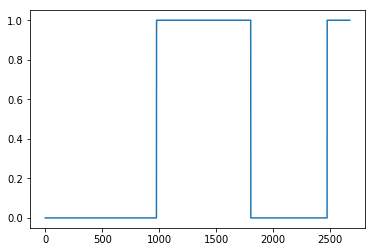

In [18]:
plot(gmm.predict(signal))

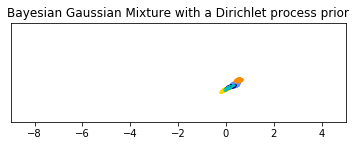

In [19]:
dpgmm = mixture.BayesianGaussianMixture(n_components=5,
                                        covariance_type='full').fit(signal)
plot_results(signal, dpgmm.predict(signal), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')


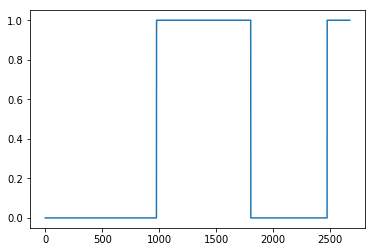

In [20]:
plot(gmm.predict(signal))

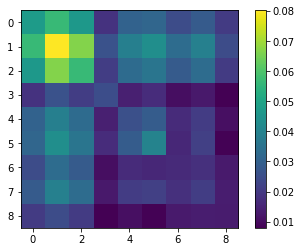

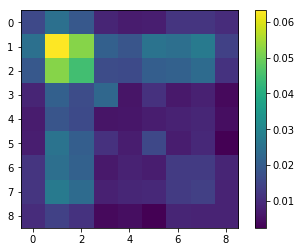

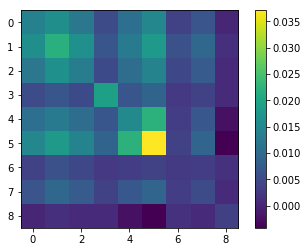

In [62]:
imshow(cov(signal,rowvar=False))
colorbar()
figure()
imshow(gmm.covariances_[0,:,:])
colorbar()
figure()
imshow(gmm.covariances_[1,:,:])
colorbar()

Protocol consists of 12 seconds of computation, followed by 28 s of rest. Intially there are 24 s of rest before starting.

array([122, 279, 121, 279, 121, 279, 121, 279, 121, 279, 121], dtype=uint32)

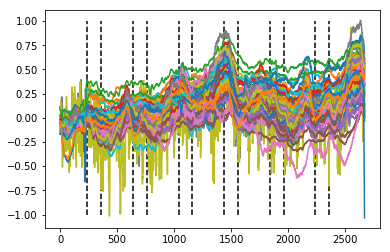

In [9]:
plot(oxy)#oxy
vlines(trial,-1,1,linestyles="--")
diff(trial)

There are three regions that are assumed to be involved in the arithmetic tasks.

12
12


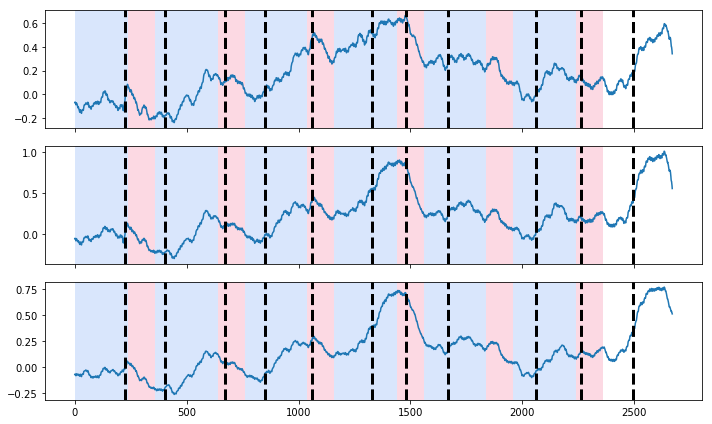

In [5]:
# detection
algo = rpt.Dynp(model="mahalanobis",min_size=10).fit(oxy[:,roi1+roi2+roi3]) #equivalent to rpt.Dynp(model="mahalanobis", params={"metric": inv(M)})
M_result = algo.predict(n_bkps=11)

rpt.display(oxy[:,roi1], trial,M_result)
print(len(M_result))
print(len(trial))

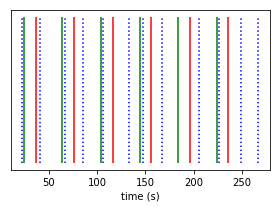

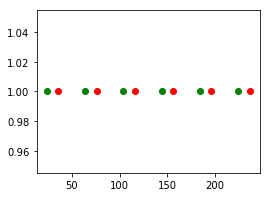

In [37]:
figure(figsize=(4,3))
t=arange(0,len(oxy))*0.1#it converts frame in time
plot(trial[::2]*0.1,ones(len(trial[::2])),"o",color="g")#start mental operation
plot(trial[1::2]*0.1,ones(len(trial[1::2])),"o",color="r")#start pause


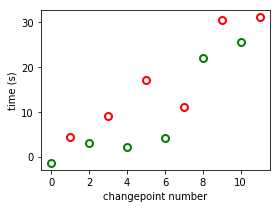

(<matplotlib.figure.Figure at 0x7f2bc86186d8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bc3fca5f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2bc3c21208>], dtype=object))

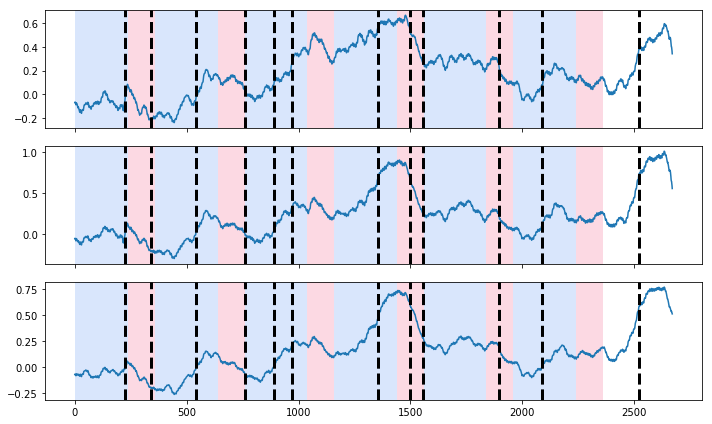

In [47]:
# detection
algo = rpt.BottomUp(model="rbf").fit(oxy[:,roi1+roi2+roi3])
result = algo.predict(n_bkps=len(trial))
rpt.display(oxy[:,roi1], trial,result)


In [18]:
algo.predict?

In [1]:
# detection
algo = rpt.BottomUp(model="rbf").fit(oxy)
result = algo.predict(n_bkps=len(trial))
vlines(trial,-1,1,linestyles="-",colors="k")
vlines(result,-1,1,linestyles="--",colors="m")

algo = rpt.BottomUp(model="rbf").fit(oxy[:,roi1+roi2+roi3])
result1 = algo.predict(n_bkps=len(trial))

vlines(result1,-1,1,linestyles="-.",colors="b")


NameError: name 'rpt' is not defined

By using the three roi it is equivalent than using all channels

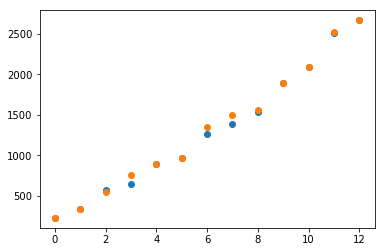

In [37]:
(array(result)-array(result1))
plot(result,"o")
plot(result1,"o")

(<matplotlib.figure.Figure at 0x7f2bc3d92198>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bc3d5b630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2bc3cdc240>], dtype=object))

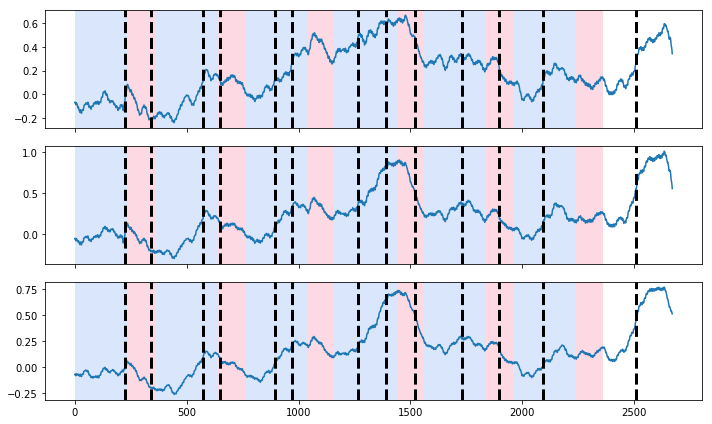

In [46]:
algo = rpt.BottomUp(model="l2").fit(oxy)
result = algo.predict(pen=25)
rpt.display(oxy[:,roi1], trial,result)

In [14]:
from scipy import io
def mat2python(repetition_number=0):
	'''This function read the SO1.mat file. The experiment is repeated 3 times, repetition_number can take values 0,1,2'''
	print(" I am loading the "+str(repetition_number)+" repetition of the protocol")
	oxy,fs,trial,y,classes=scipy.io.loadmat("S01.mat")["data"][repetition_number][0][0,0]
	return oxy,trial,classes

 I am loading the 0 repetition of the protocol


NameError: name 'scipy' is not defined

(<matplotlib.figure.Figure at 0x7fe44593b470>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4608e7080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe4608d6128>], dtype=object))

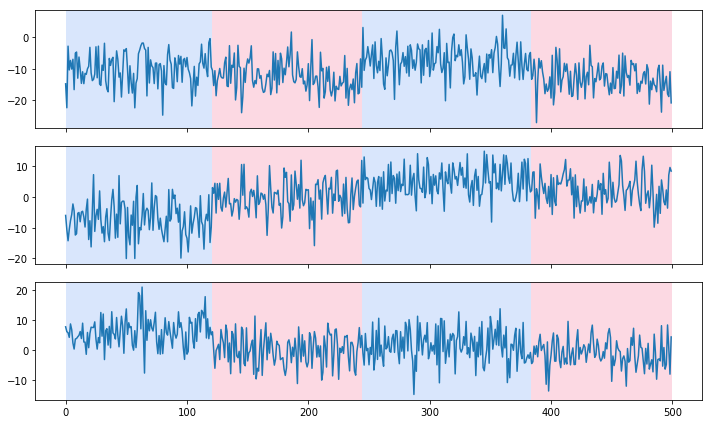

In [10]:
n, dim = 500, 3  # number of samples, dimension
n_bkps, sigma = 3, 5  # number of change points, noise standart deviation
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)
rpt.display(signal, bkps)


In [11]:
bkps

[121, 245, 384, 500]

In [14]:
colorbar?

In [50]:
from scipy import io
a=scipy.io.loadmat("S01.mat")
a

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Nov  7 08:59:48 2014',
 '__version__': '1.0',
 'data': array([[array([[(array([[-0.05030407, -0.0392253 , -0.03925408, ..., -0.0711086 ,
         -0.23679121, -0.03350563],
        [-0.04804391, -0.03640525, -0.03662443, ..., -0.06913219,
         -0.22448279, -0.03292184],
        [-0.04985377, -0.03603106, -0.03738518, ..., -0.06894061,
         -0.21320799, -0.03932559],
        ...,
        [ 0.14079334,  0.26870659,  0.37763703, ..., -0.21089342,
         -1.38118714,  0.2762063 ],
        [ 0.14197713,  0.26195821,  0.37094858, ..., -0.22480175,
         -1.5953831 ,  0.2845535 ],
        [ 0.14649855,  0.25435451,  0.36169291, ..., -0.24278229,
         -1.88317591,  0.29662598]]), array([[10]], dtype=uint8), array([[ 238],
        [ 360],
        [ 639],
        [ 760],
        [1039],
        [1160],
        [1439],
        [1560],
        [1839],
        [1960],
        [2239],
       